## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Label: 9


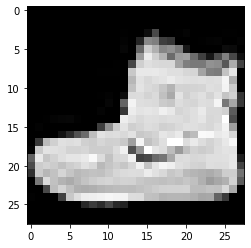

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[0]))
plt.imshow(x_train[0], cmap='gray')

### Find no.of samples are there in training and test datasets

In [3]:
x_train.shape[0]

60000

In [4]:
x_test.shape[0]

10000

### Find dimensions of an image in the dataset

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train.shape[-2:]

(28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
x_train.shape[-2:]

(28, 28)

In [9]:
#The dimension of an image in the dataset is 28x28

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [10]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (60000, 10)
One value of y_train: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255
x_test = x_test/255

In [13]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [14]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

### Import the necessary layers from keras to build the model

In [15]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation,Dense,Flatten,MaxPooling2D,Convolution2D,Dropout
from keras.utils import np_utils

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [17]:
model=Sequential()
model.add(Convolution2D(filters=32, kernel_size=3, activation="relu",input_shape=(28,28,1)))
model.add(Convolution2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5,mode='auto',verbose=1)
callback_list=[early_stopping]
model.fit( x=x_train, y=y_train, batch_size=500, epochs=10, validation_data=(x_test,y_test),callbacks=callback_list)

Epoch 1/10
120/120 [==============================] - 11s 40ms/step - loss: 0.7890 - accuracy: 0.7248 - val_loss: 0.3773 - val_accuracy: 0.8652
Epoch 2/10
120/120 [==============================] - 5s 39ms/step - loss: 0.3462 - accuracy: 0.8761 - val_loss: 0.3389 - val_accuracy: 0.8751
Epoch 3/10
120/120 [==============================] - 5s 39ms/step - loss: 0.2774 - accuracy: 0.9010 - val_loss: 0.3056 - val_accuracy: 0.8923
Epoch 4/10
120/120 [==============================] - 5s 38ms/step - loss: 0.2501 - accuracy: 0.9095 - val_loss: 0.2784 - val_accuracy: 0.8980
Epoch 5/10
120/120 [==============================] - 5s 38ms/step - loss: 0.2118 - accuracy: 0.9242 - val_loss: 0.2637 - val_accuracy: 0.9051
Epoch 6/10
120/120 [==============================] - 5s 39ms/step - loss: 0.1904 - accuracy: 0.9323 - val_loss: 0.2659 - val_accuracy: 0.9103
Epoch 7/10
120/120 [==============================] - 5s 39ms/step - loss: 0.1644 - accuracy: 0.9403 - val_loss: 0.2727 - val_accuracy: 0.904

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [18]:
model2=Sequential()
model2.add(Convolution2D(filters=32, kernel_size=3, activation="relu",input_shape=(28,28,1)))
model2.add(Convolution2D(filters=32, kernel_size=3, activation="relu"))
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation="relu"))
model2.add(Dense(10, activation="softmax"))
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5,mode='auto',verbose=1)
callback_list=[early_stopping]
model2.fit( x=x_train, y=y_train, batch_size=500, epochs=10, validation_data=(x_test,y_test),callbacks=callback_list)

Epoch 1/10
120/120 [==============================] - 5s 35ms/step - loss: 0.9445 - accuracy: 0.6774 - val_loss: 0.4382 - val_accuracy: 0.8468
Epoch 2/10
120/120 [==============================] - 4s 34ms/step - loss: 0.4060 - accuracy: 0.8563 - val_loss: 0.3753 - val_accuracy: 0.8652
Epoch 3/10
120/120 [==============================] - 4s 34ms/step - loss: 0.3378 - accuracy: 0.8799 - val_loss: 0.3213 - val_accuracy: 0.8859
Epoch 4/10
120/120 [==============================] - 4s 33ms/step - loss: 0.2992 - accuracy: 0.8914 - val_loss: 0.2944 - val_accuracy: 0.8924
Epoch 5/10
120/120 [==============================] - 4s 34ms/step - loss: 0.2712 - accuracy: 0.9023 - val_loss: 0.2810 - val_accuracy: 0.8984
Epoch 6/10
120/120 [==============================] - 4s 34ms/step - loss: 0.2532 - accuracy: 0.9081 - val_loss: 0.2648 - val_accuracy: 0.9041
Epoch 7/10
120/120 [==============================] - 4s 34ms/step - loss: 0.2406 - accuracy: 0.9127 - val_loss: 0.2669 - val_accuracy: 0.9034

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [19]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to be 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=50, # randomly rotate images in the range (0 to 180 degrees)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
    horizontal_flip=False, # randomly flip images horizontally
    vertical_flip=False # randomly flip images vertically
)

# prepare the generator
datagen.fit(x_train)


In [20]:
x_train.shape

(60000, 28, 28, 1)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

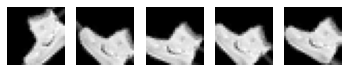

In [21]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [22]:
model3=Sequential()
model3.add(Convolution2D(filters=32, kernel_size=3, activation="relu",input_shape=(28,28,1)))
model3.add(Convolution2D(filters=32, kernel_size=3, activation="relu"))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation="relu"))
model3.add(Dense(10, activation="softmax"))
model3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5,mode='auto',verbose=1)
callback_list=[early_stopping]
model3.fit_generator(datagen.flow(x_train,y_train,batch_size=32),steps_per_epoch=x_train.shape[0]/32,
                    epochs=20,validation_data=(x_test,y_test),callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1875/1875 [==============================] - 30s 15ms/step - loss: 1.0019 - accuracy: 0.6318 - val_loss: 0.5427 - val_accuracy: 0.7970
Epoch 2/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5995 - accuracy: 0.7732 - val_loss: 0.5256 - val_accuracy: 0.7975
Epoch 3/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5191 - accuracy: 0.8071 - val_loss: 0.4586 - val_accuracy: 0.8348
Epoch 4/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4844 - accuracy: 0.8174 - val_loss: 0.4123 - val_accuracy: 0.8519
Epoch 5/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4585 - accuracy: 0.8293 - val_loss: 0.4091 - val_accuracy: 0.8458
Epoch 6/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4376 - accuracy: 0.8374 - val_loss: 0.3767 - val_accuracy: 0.8666
Epoch 7/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4322 - accuracy: 0.8390 - val_loss: 0.3827 -

###  Report the final train and validation accuracy

In [23]:
model3.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3305 - accuracy: 0.8872


[0.3304853141307831, 0.8871999979019165]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [24]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [25]:
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [26]:
datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to be 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=50, # randomly rotate images in the range (0 to 180 degrees)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
    horizontal_flip=True, # randomly flip images horizontally
    vertical_flip=True # randomly flip images vertically
)

### **Prepare/fit the generator.**

In [27]:
datagen.fit(X_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

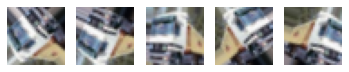

In [28]:
from matplotlib import pyplot as plt
gen = datagen.flow(X_train[1:2], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().astype('uint8').squeeze())
    plt.plot()
plt.show()